<table>
    <tr>
        <td><a href="https://www.greedyai.com/"><img src="http://smallpay.greedyai.com/skin/images/logoNew.png">   </td>
        <td> <a href="http://aijiaoai.greedyai.com/home"><img src="http://smallpay.greedyai.com/%E5%8C%A0%E5%BF%83%E5%81%9A%E4%BA%8B.jpg">    </td>
    </tr>
</table>

<hr />

# 数据探索性分析

In [3]:
import pandas as pd
sale_data = 'sale_data.xls'
data = pd.read_excel(sale_data, index_col='日期')
data

,销量
日期,
2020-03-01,51.0
2020-02-28,2618.2
2020-02-27,2608.4
2020-02-26,2651.9
2020-02-25,3442.1
2020-02-24,3393.1
2020-02-23,3136.6
2020-02-22,3744.1
2020-02-21,6607.4


In [4]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


In [5]:
import matplotlib.pyplot as plt
#设置中文显示
plt.rcParams['font.sans-serif']=['SimHei']
#显示正负号
plt.rcParams['axes.unicode_minus']=False
#创建画布
plt.figure(figsize=(5,10))
p = data.boxplot(return_type='dict')
#显示异常点的值
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i],xy=(x[i],y[i]), xytext=(x[i] + 0.01 - 0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy=(x[i],y[i]), xytext=(x[i]+0.05,y[i]))
plt.show()

<Figure size 500x1000 with 1 Axes>

## 数据特征分析中的贡献度分析   帕累托分析   二八原则

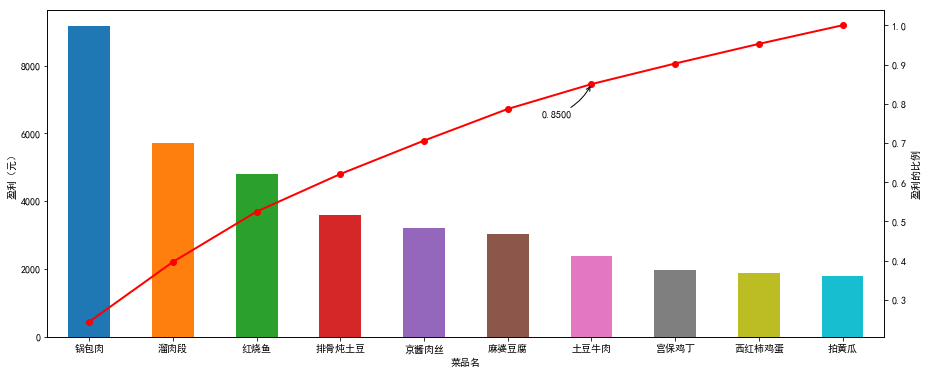

In [32]:
dish_profit = 'dish_profit.xls'
data = pd.read_excel(dish_profit,index_col='菜品名')
data = data['盈利'].copy()
plt.figure(figsize=(15,6))
data.plot(kind='bar')
plt.ylabel("盈利（元）")

p = 1.0 * data.cumsum()/data.sum()

p.plot(color='r',secondary_y=True,style='-o', linewidth=2)

plt.annotate(format(p[6],'.4f'),
            xy = (6,p[6]),
            xytext=(6*0.9,p[6]*0.9),
            arrowprops = dict(arrowstyle='->',
                             connectionstyle='arc3,rad=.2')
            )
plt.ylabel("盈利的比例")
plt.show()


## 对缺失值的处理

In [35]:
#拉格朗日差值
from scipy.interpolate import lagrange
#定义两个文件，输入文件和结果输出文件
inputfile = 'sale_data.xls'
outputfile = 'tem_sales.xlsx'

#读取输入文件数据
data = pd.read_excel(inputfile)

#定义异常数据的含义，比如说，销量小于400或销量大于5000，我们认为他是异常数据，就把他控制
data['销量'][(data['销量'] < 400) | (data['销量'] > 5000)] = None

#自定义一个列向量插值的函数
#s 是列向量，n 是插值的位置，k是取前后的数据的个数
def insert_column_data(s,n,k=5):
    #取数
    y = s[list(range(n-k)) + list(range(n+1,n+1+k))]
    #提出空值
    y = y[y.notnull()]
    return lagrange(y.index, list(y))(n)
#现在我们来逐个一次的判断是否需要插值
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]: # 如果为空就插值
            data[i][j] = insert_column_data(data[i],j)

#将输出的结果，写入到文件中
data.to_excel(outputfile)


    
    

C:\Users\wangmengxian\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\wangmengxian\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:

import numpy as np
 
arr=np.array([[1,2,3],[4,5,6],[7,8,9]])
 

    

arr.cumsum()#array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)


array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)